# Intro to Hopfield Networks, Boltzmann Machines and RBMs

Author: Jeremy Rothschild

[Overview](#linkOverview)
[Hopfield Networks](#linkHopfield)  
[Boltzmann Machine](#linkBM)   
[Restricted Boltzmann Machines](#linkRBM)  
[Example: Simple Networks](#linkEx1)
[Example: MNIST](#linkEx2)
[Resources](#linkResources)  

### Overview <a id='linkOverview'></a>
- This tutorial briefly goes over certain notions of Hopfield Networks and Boltzmann Machines to introduce Restricted Boltzmann Machines (RBM).
- RBMs are useful algorithms for dimensionality reduction, classification, regression, collaborative filtering, feature learning and topic modeling
- They are sometimes considered as the simplest recursive neural network, and can be used to construct deep networks

### Briefly on Hopfield Networks <a id='linkHopfield'></a>

#### Structure
A Hopfield network is a complete undirected graph with nodes (neurons/units) whose state depends on whether or not input to this node exceeds a threshold. What do we mean by this?
<a href="https://www.researchgate.net/figure/Schematics-of-a-Hopfield-network-update-step-a-Classical-Hopfield-network-update-Here_fig2_321417576"><img src="https://www.researchgate.net/profile/Gian_Giacomo_Guerreschi/publication/321417576/figure/fig2/AS:566594373525504@1512098033369/Schematics-of-a-Hopfield-network-update-step-a-Classical-Hopfield-network-update-Here.png" alt="Schematics of a Hopfield network update step. (a) Classical Hopfield network update. Here at step t, the neuron 6 is chosen for update. The new state z"/></a> 
Image taken from: *Quantum Neuron: an elementary building block for machine learning on quantum computers - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Schematics-of-a-Hopfield-network-update-step-a-Classical-Hopfield-network-update-Here_fig2_321417576 [accessed 25 Oct, 2019]*

- **_graph_**: A set of vertices and edges in which the edges define relations between the vertices
- **_nodes_**: units/vertices, denoted $s_i$ for the $i^\text{th}$ node, that are connected by weights. Generally these are binary $\{-1,1\}$, however similar structure for continuous nodes
- **_weights_**: synonym of edges, the connections $w_{ij}$ between the node $s_i$ and $s_j$. Vertices have no connection with themselves, $w_{ii} = 0$.
- **_undirected graph_**: All edges between two nodes do not have a preferred directed, in other words $w_{ij}=w_{ji}$
- **_input_**: $s_i$ receives as input the value of all the nodes weighted by the edge weights $w_{ij}s_j$ and a correspondig bias $b_i$, $\sum_j w_{ij}s_j - b_i$

#### Update Rule
If $\sum_j w_{ij}s_j - b_i \geq 0: s_i \leftarrow 1 $,

Else if $\sum_j w_{ij}s_j - b_i < 0: s_i \leftarrow 1 $.

In a language more familiar to us, we can define an energy function which is either constant or reduced at each step. This is analogous to 

$E=-\frac{1}{2}\sum_{i,j}w_{ij}s_is_j-\sum_{i}b_is_i$.

Notice that the update rule is simply a statement about the difference of energy required to switch between states ${-1,1}$, ensuring a decrease in energy at each step.

How we decide to update these vertices is important. Synchronous updates may create periodic patterns (what does a  synchronous update mechanism even mean physically?), whereas asynchronous updates converge to stable minima.

#### Notes on Hopfield networks

1. Hopfields are an example of Markov Random Fields
2. In asynchronous updates, convergence is generally assured (shown by Hopfield)
3. Training involves lowering energy of states that we want the network to converge to (minima)
4. Minima $S^n=\{s^n_i\}$ (often referred to as *memories*)of the energy function can be encoded by clever selection of the weights. For example, Hebbian learning assigns the rule for a set of $N$ memories, $\{S^n\}$, : $w_{ij}=\frac{1}{N}\sum_n^N s^n_is^n_j$
5. Can we say something about the probability of certain minima?

### Boltzmann Machines <a id='linkBM'></a>

#### Structure

The structure of Boltzmann machines are very similar to those of Hopfield networks, the difference lies in their update rules.

Conventionally (to simplify certain derivations and confuse readers), the states of a Boltzmann are written as $\{0,1\}$ for the state of the node as {off,on}.

#### Update Rule

Similar to Hopfield networks, we have an energy $E=-\frac{1}{2}\sum_{i,j}w_{ij}s_is_j-\sum_{i}b_is_i$.

Whereas the Hopfield networks have a 'deteministic' update rule, Boltzmann machines assign a probability of being in microstate. That the probability of a state should be proportional to the exponential of the energy

$P(s_i\in \{1,0\})=\frac{1}{Z}e^{-E(s_i)/k_BT}$

Note that when updating a node $s_i$ in our system, we ask whether or not the node should be $s_i=0$ or $s_i=1$, which we can find from the difference in energies. Taking log of probabilities(by neglecting log$Z$), we find that the probability of being on $s_i=1$ is

$P(s_i=1)=\frac{1}{1+e^{-(E(s_i=0)-E(s_i=1))/k_B T)}}$.

For this derivation, recall that $P(s_i=1)+P(s_i=0)=1$. Draw from a uniform distribution $x\in[0,1]$ and if $x<P(s_i=1)$, assign $s_i=1$, else $s_i=0$. 

Thus there's a probability that the switching happens even if it induces an increase in the energy of the system. This is why Boltzmann mahcines are often referred to as stochastic Hopfield networks.

#### Visible and hidden units

Suppose we have some network/machine with. Not all these units might correspond to our observables/data $\textbf{V}$. They correspond to higher order interactions.
<img src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Boltzmannexamplev1.png" alt="Hidden and visible nodes"/>
Image taken from: Wikipedia, Boltzmann Machine.

#### Training

Given a dataset $\textbf{V}=\{\textbf{v}^n\}$ (size of dataset, $|V|=N$), we would like to find the weights of our network that can recreate the structure of the data most accurately, i.e. find the parameters $\textbf{W}=\{w_{ij}\}$ that maximize (minimize) the likelihood $\mathcal{L}$ (negative log-likelihood). 

$-\ln{\mathcal{L}}=-\frac{1}{N}\sum_{n=1}^N\ln{p(\textbf{v}^n;\textbf{W})}$

To extremize $(W)$ over the likelihood, we will solve $-\frac{ \partial \ln{\mathcal{L}}}{w_{ij}}=0$ and use gradient descent ($w_{ij}^{t+1}=w_{ij}^{t+1}-\alpha \frac{ \partial \ln{\mathcal{L}}}{w_{ij}}$).

We can write our probabilities as

$p(\textbf{v}^n;\textbf{W})=\sum_h p(\textbf{v}^n,h;\textbf{W})=\frac{1}{Z}\sum_he^{-E(\textbf{v}^n,h)/k_B T} $

where $Z=\sum_{v,h}e^{-E(v,h)/k_B T}$. After some math (see REF) we obtain

$-\frac{\partial \ln{\mathcal{L}}}{w_{ij}}=\frac{1}{N}\sum_{n=1}^N \sum_h p(h|\textbf{v}^n)\frac{\partial E(\textbf{v}^n,h)}{\partial w_{ij}} - \sum_{h,v} p(\textbf{v},h)\frac{ \partial E(\textbf{v},h) }{\partial w_{ij}}$

We can get similar expressions for the biases.
This is difficult to calculate, given that the sums in the second term involve computing all the configurations possible of v and h. Computationally possible, albeit long to do.

Are there structures for Boltzmann machine structures for which this is  feasible problem? Are there restrictions we can make in our architecture that simplify the above expression?

### Restricted Boltzmann Machines <a id='linkRBM'></a>

#### Structure

In general Boltzmann machines, there is no restriction as to connections between hidden units and visible units.However, let us design a network such that all weigths from hidden units to visible ones are 0 (effectively for all hidden pairs $(h_i,h_j)$, $w_{ij}=0$} and similarly for visible pairs $(v_i,v_j)$). This gives us 2 layers: a hidden and a visible layer.

<img src="https://miro.medium.com/max/665/1*Z-uEtQkFPk7MtbolOSUvrA.png" alt="RBM"/>
Image taken from: Medium[https://medium.com/datatype/restricted-boltzmann-machine-a-complete-analysis-part-1-introduction-model-formulation-1a4404873b3].

Although this system is more constrained it is much easier to train, as we shall see shortly.

We can write the energy function as $E=-\frac{1}{2}\sum_{i,j}w_{ij}v_ih_j-\sum_{i}b_iv_i-\sum_{j}c_jh_j$.

Given all hidden units, visible units are independant. Similarly for hidden units. This simplifies our probabilities greatly.

Conditional probabilities factor nicely:

$P(h|v)=\Pi^n_i P(h_i|v)$ and $P(v|h)=\Pi^m_j P(v_i|h)$

where

$P(h_i=1|v)=\text{sigm}(\sum^m_j w_{ij} v_j + c_i)$ and $P(v_j=1|h)=\text{sigm}(\sum^n_i w_{ij} h_i + b_j)$.

#### Training Cont'd

- Simplification of previous results

$-\frac{\partial \ln{\mathcal{L}}}{w_{ij}}=\frac{1}{N}\sum_{n=1}^N P(h_i=1|v^n)v^n_j-\sum_v P(v)P(h_i=1|v)$

This is often written as ${\langle v_ih_j \rangle}_{data}-{\langle v_ih_j \rangle}_{model}$.

The first term of this sum is rather simple, sum over all data points in your set and you're good to go (can easily be done in parallel too!). However the second term is rather problematic. There is still the need to sample over all possible configurations of the model $P(v)$.

- Gibbs Sampling

Need to estimate an average over a distribution

Algorithm:
1. Initialize $\vec{x}^{(0)}$ from the prior distribution $P(\vec{x})$
2. Iterate for a certain number of time steps i in (0,...,T) and sample

    $x_1^{(i)}\sim P(X_1=x_1|\{X_j=x_j^{(i-1)}\}_{j \neq 1})$

    ...

    $x_N^{(i)}\sim P(X_N=x_N|\{X_j=x_j^{(i-1)}\}_{j \neq N})$
    
3. Check convergence

There is a guarantee that for long enough *Gibbs chain*

- Contrastive Divergence

Applying Gibbs Sampling to our ${\langle v_ih_j \rangle}_{model}$. Convergence proved by Bengio and Delalleau.

#### Extensions worth looking into

1. Non-binary/Continuous states

2. Relation between Hopfield Networks and RBMs

3. RBM for quantum mechanics

4. Deep hidden layers

### Example: A simple RBM <a id='linkEx1'></a>

In [ ]:
import numpy as np
from sklearn.neural_network import BernoulliRBM

X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]]) # not large enough of course
model = BernoulliRBM(n_components=2) # number of hidden units
model.fit(X)  
BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=2, n_iter=10,
       random_state=None, verbose=0)

### Example: MNIST <a id='linkEx2'></a>

In [2]:
print(__doc__)

# Authors: Yann N. Dauphin, Vlad Niculae, Gabriel Synnaeve
# License: BSD

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone


# #############################################################################
# Setting up

def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    def shift(x, w):
        return convolve(x.reshape((8, 8)), mode='constant', weights=w).ravel()

    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y

Automatically created module for IPython interactive environment


In [5]:
# Load Data
digits = datasets.load_digits()
X = np.asarray(digits.data, 'float32')
X, Y = nudge_dataset(X, digits.target)
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scaling

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)

# Models we will use
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1,
                                           multi_class='multinomial')
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])


In [6]:
# Training

# Hyper-parameters. These were set by cross-validation, using a GridSearchCV. 
# Here we are not performing cross-validation to save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20
rbm.n_components = 100 # More components tend to give better prediction performance, but larger fitting time
logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, Y_train)

# Training the Logistic regression classifier directly on the pixel
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.
raw_pixel_classifier.fit(X_train, Y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.39, time = 0.47s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -23.77, time = 0.52s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -22.94, time = 0.58s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21.91, time = 0.83s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -21.69, time = 0.64s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -21.06, time = 0.62s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -20.89, time = 0.54s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -20.64, time = 0.52s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -20.36, time = 0.49s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -20.09, time = 0.59s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -20.08, time = 0.79s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -19.82, time = 0.82s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -19.64, time = 0.78s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -19.61, time = 0.83s
[BernoulliRBM] Iteration 15, 

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=1, verbose=0, warm_start=False)

In [7]:
# Evaluation

Y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Y_pred = raw_pixel_classifier.predict(X_test)
print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       174
           1       0.90      0.92      0.91       184
           2       0.92      0.95      0.93       166
           3       0.96      0.89      0.92       194
           4       0.97      0.93      0.95       186
           5       0.94      0.93      0.94       181
           6       0.98      0.98      0.98       207
           7       0.92      0.99      0.95       154
           8       0.89      0.88      0.89       182
           9       0.91      0.93      0.92       169

   micro avg       0.94      0.94      0.94      1797
   macro avg       0.94      0.94      0.94      1797
weighted avg       0.94      0.94      0.94      1797


Logistic regression using raw pixel features:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       174
           1       0.60      0.59      0.59  

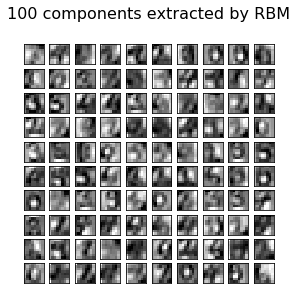

In [8]:
# Plotting
plt.rcParams["figure.figsize"] = (10, 10)

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

#plt.show()

2


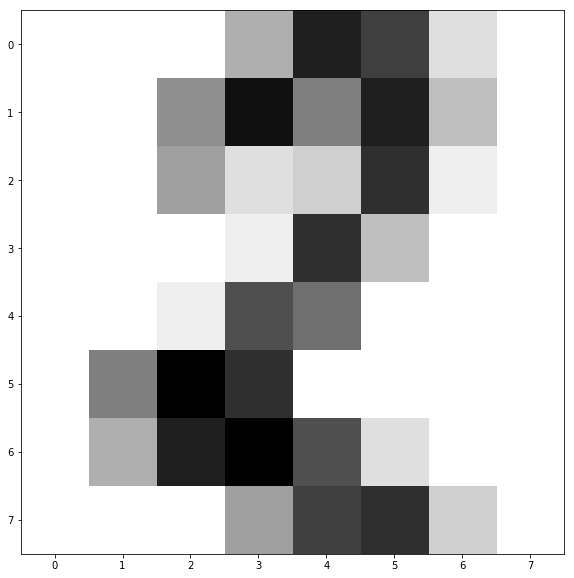

In [14]:
print(Y[50])

plt.imshow(X[50].reshape((8, 8)), cmap=plt.cm.gray_r,
               interpolation='nearest')

[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.39, time = 0.44s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -23.77, time = 0.50s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -22.94, time = 0.56s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21.91, time = 0.49s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -21.69, time = 0.51s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -21.06, time = 0.52s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -20.89, time = 0.49s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -20.64, time = 0.50s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -20.36, time = 0.51s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -20.09, time = 0.84s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -20.08, time = 0.84s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -19.82, time = 1.02s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -19.64, time = 0.84s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -19.61, time = 0.96s
[BernoulliRBM] Iteration 15, 

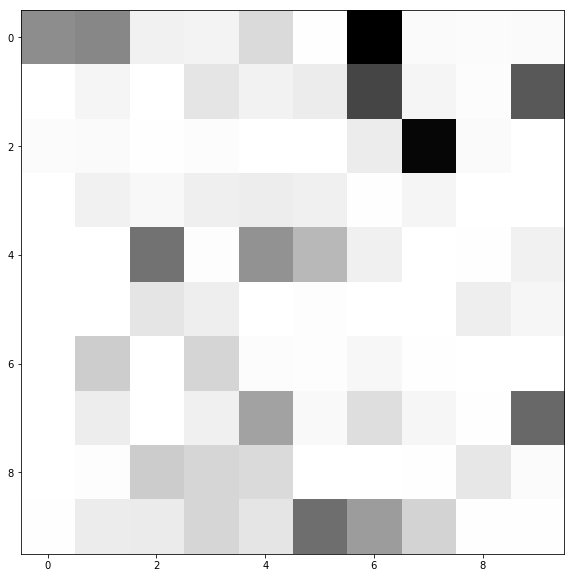

In [22]:
# Here I try to see what the result of fitting data to a learned model. Seems that the
# output is the hidden nodes, I don't know how to get back the visible nodes
rbmX=rbm.fit_transform(X_train, Y_train)
""""
print(Y[50])
rbmX=rbm.gibbs(X[50])
"""
plt.imshow(rbmX[200].reshape((10, 10)), cmap=plt.cm.gray_r,
               interpolation='nearest')

### Resources <a id='linkResources'></a>

#### Most useful links I found

- [Excellent overview](https://christian-igel.github.io/paper/TRBMAI.pdf)
- [Simple review](http://www.cs.utoronto.ca/~hinton/csc321/readings/boltz321.pdf)
- [Blog style post](https://medium.com/@neuralnets/boltzmann-machines-transformation-of-unsupervised-deep-learning-part-1-42659a74f530)

#### Classic Papers
- [Hopfield Network](https://www.pnas.org/content/pnas/79/8/2554.full.pdf)
- [Hinton's Boltzmann Machine learning algortithm](https://www.sciencedirect.com/science/article/pii/S0364021385800124)

#### scikit-learn links
- [MNIST example](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html)
- [scikit-learn BernoulliRBM](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.BernoulliRBM.html)
- [Pipeline tutorial](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

#### Further reading

- [On the equivalence of Hopfield networks and Boltzmann Machines](https://www.sciencedirect.com/science/article/pii/S0893608012001608)
- [Simulating complex wavefunctions](https://www.nature.com/articles/s41567-019-0545-1)